# Relatório de Análise VII


## Criando Agrupamentos


In [380]:
# O objetivo é continuar observando e verificando a nossa base de dados para tentar encontrar mais coisas erradas que podem atrapalhar nossa análise no futuro
import pandas as pd

In [381]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [382]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


In [383]:
# Para fazer essa análise, vamos fazer estatística descritiva

dados['Valor'].mean()

# obtenho a média de todos os valores

5046.172821405663

In [384]:
# Agora não quero a média geral, quero a média de acordo com um tipo de variáveis, como bairro
# Quero saber o valor médio de aluguel para copacabana, barra, etc
# Para ajudar na nossa visualização, vou selecionar apenas alguns bairros
# Crio uma lista:

bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [385]:
#Vamos fazer uma seleção:

selecao = dados['Bairro'].isin(bairros)

# Criando um novo dataframe:
dados = dados[selecao]

In [386]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [387]:
# Vamos criar o primeiro grupo em cima desses bairros:

grupo_bairro = dados.groupby('Bairro')

In [388]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [389]:
grupo_bairro.groups

#Ele mostra um dicionário, onde a chave é a variável que estamos usando como indexador - Bairro-, e os índices onde ele encontrou esse registro
# ELe faz a indexação do dataframe pra facilitar depois as consultas e criação de tabelas em cima disso

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [390]:
#Vamos ver mais informações dentro desse grupo:

for bairro, data in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [391]:
#Vamos ver mais informações dentro desse grupo:

for bairro, data in grupo_bairro:
    print(data)
    
# Ele armazena todos os nossos dados

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPTU  
5      22000.0         0.0     0.0  
14      1700.

In [392]:
# O tipo dos dados armazenados são:

for bairro, data in grupo_bairro:
    print(type(data))
    
# Ele armazena todos os nossos dados. ELe guarda um dataframe para cada bairro

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [393]:
# A gente queria o valor médio da variável valor segundo a variável bairro


for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

# Temos a média para cada bairro


Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [394]:
# A gente não criou o grupo para isso. O grupo é muito mais simples e podemos fazer de uma maneira muito mais simples.
# A gente já viu que o dataframe tem todas as variáveis e vamos passar esse grupo, escolher uma variável dentro dele, que é o valor e vamos pedir a média. Faz a mesma coisa que fizemos acima

grupo_bairro['Valor'].mean().round(2)

Bairro
Barra da Tijuca    7069.55
Botafogo           8791.83
Copacabana         4126.68
Flamengo           4113.53
Ipanema            9352.00
Leblon             8746.34
Tijuca             2043.52
Name: Valor, dtype: float64

In [395]:
# Posso passar dentro do grupo criado, mais de uma variável:
# Ele criou um dataframe, com as médias de valor e condomínio e bairro

grupo_bairro[['Valor', 'Condominio']].mean().round(2)



,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


## Estatísticas Descritivas

In [396]:
# Criamos o grupo vamos utilizar isso e gerar uma estatística descritiva em cima desse grupo
# Vamos mostrar outras formas de fazer isso

grupo_bairro['Valor'].describe().round(2)

# O describe() tem um conjunto, ele gera um conjunto de estatísticas descritivas. 
# Cria um dataframe(DF) com count, média, desvio padrão, quartis(25% - 25% está abaixo desse valor e 75% acima, 50% mediana - faz a mesma coisa 50-50, e 75% - divide 75% pra baixo e 25% pra cima), valor mínimo e máximo
# Olhando o desvio padrão, vemos que em Botafogo, temos variação BEM elevada e a Barra também. 
# Se olharmos para o máximo, vemos dois valores esquesitíssimos ali, porque estamos olhando valores de aluguel, e esses valores altos estão dizendo que tem imóvel em Botafogo, sendo alugado por 4500000.0, o que não faz sentido. Provavelmente temos uma informação da venda de dados no local errado. Mesma coisa para a Barra

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [397]:
# Outra coisa que podemos fazer para gerar essas estatísticas é usar o aggregate e passo como argumento, o conjunto de estatísticas que me interessam.

grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min':'Minimo','max':'Máximo','sum':'Soma' })

,Minimo,Máximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [398]:
# Conseguimos visualizar esses problemas aqui porque temos poucas informações, imagina se tivermos todos os bairros das cidades, fica difícil a leitura e não conseguimos ver no Jupyter. Teríamos que exportar do Jupyter e ver em outro local para fazermos uma análise mais detalhada e fica difícil encontrarmos problema dentro do jeito que está.
# Para facilitar a nossa visualização, vamos começar a entender como fazemos para fazer análise gráfica
# matplotlib -> que é um pacote do Python que foi criado com intuito de gerar visualizações do tipo que são feitas no matlab, mas em Python

In [1]:
# Para funcionar no Jupyter, temos que fazer uma configuraçãozinha:
# O inline mostra uma figura/gráfico estático na tela

%matplotlib inline

import matplotlib.pyplot as plt

# Vamos configurar o tamanho que queremos que essa figura fique na nossa tela para podermos visualizar melhor 
plt.rc('figure', figsize = (20, 10))



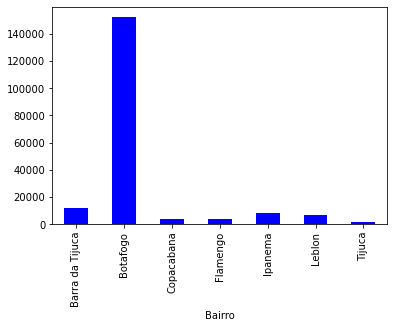

In [400]:
#Bar = gráfico de barras

grupo_bairro['Valor'].std().plot.bar(color = 'blue')

#Aqui tem uma pista de que tem alguma coisa errada e onde devemos começar a fazer investigação

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

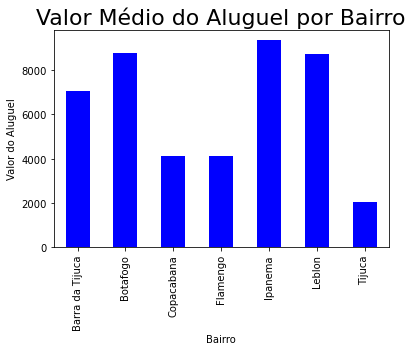

In [401]:
# Fazendo configuração no nosso gráfico porque vamos precisar dele para fazer nosso relatório

fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

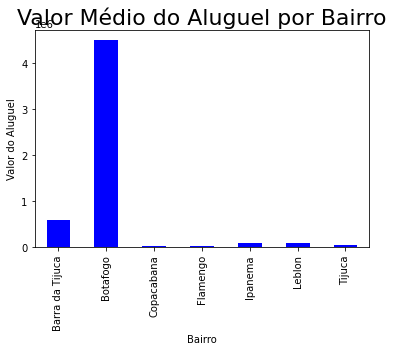

In [402]:
# Posso gerar uma função, gráficos desse tipo para outras estatísticas e deixar pronto para fazer as análises:

fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})

# Consigo ver que em botafogo tenho um problema

# Vamos tentar tirar esses outlines